# Step 1 Importing libraries & functions

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

# Step 2 Importing dataset

In [2]:
dataset = pd.read_csv(r'C:Scorecard.csv')

# Step 3 Exploring Data

In [3]:
# count of rows and columns
dataset.shape

(3000, 30)

In [4]:
#shows first few rows of the code
dataset.head(5)

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,1.0,0.0,2,3,7,0.0,4,4,0.0
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,1.0,0.0,0,0,0,1.0,12,0,1.0
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.0,1.0,0,1,1,1.0,1,1,1.0
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,1.0,0.0,1,1,1,1.0,7,1,1.0
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.0,0.0,0,1,4,0.0,3,1,0.0


In [5]:
dataset.describe()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2812.000000,3000.000000,3000.000000,3000.000000,...,2901.000000,2959.000000,2996.000000,3000.000000,3000.000000,3000.000000,2997.000000,3000.000000,3000.000000,2997.000000
mean,0.166667,62922.683667,1.430000,0.857000,0.153333,3.108333,3.108108,3.555000,170.113667,11.873667,...,4.077904,0.757350,0.581776,0.726000,0.814667,2.522000,0.510511,1.409000,1.068333,0.564231
std,0.372740,37203.691912,2.731469,2.161352,0.360369,3.479171,4.637831,4.477536,92.813700,16.321412,...,3.108076,0.435019,0.493350,1.163633,1.609508,3.407255,0.499973,2.460434,1.806124,0.616010
min,0.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30376.500000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,106.000000,4.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,62872.500000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,151.000000,7.000000,...,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,0.000000,96156.500000,2.000000,1.000000,0.000000,4.000000,3.000000,5.000000,227.000000,13.000000,...,6.000000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,2.000000,1.000000,1.000000
max,1.000000,126503.000000,51.000000,50.000000,1.000000,40.000000,24.000000,48.000000,933.000000,342.000000,...,23.000000,3.000000,1.000000,8.000000,19.000000,45.000000,1.000000,47.000000,20.000000,6.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET           3000 non-null   int64  
 1   ID               3000 non-null   int64  
 2   DerogCnt         3000 non-null   int64  
 3   CollectCnt       3000 non-null   int64  
 4   BanruptcyInd     3000 non-null   int64  
 5   InqCnt06         3000 non-null   int64  
 6   InqTimeLast      2812 non-null   float64
 7   InqFinanceCnt24  3000 non-null   int64  
 8   TLTimeFirst      3000 non-null   int64  
 9   TLTimeLast       3000 non-null   int64  
 10  TLCnt03          3000 non-null   int64  
 11  TLCnt12          3000 non-null   int64  
 12  TLCnt24          3000 non-null   int64  
 13  TLCnt            2997 non-null   float64
 14  TLSum $          2960 non-null   float64
 15  TLMaxSum $       2960 non-null   float64
 16  TLSatCnt         2996 non-null   float64
 17  TLDel60Cnt    

# Step 4 Cleaning Data

In [7]:
#1.dropping customer ID column 
dataset=dataset.drop('ID',axis=1)
dataset.shape

(3000, 29)

In [8]:
#2. explore missing values
dataset.isna().sum()

TARGET               0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum $             40
TLMaxSum $          40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

<AxesSubplot:>

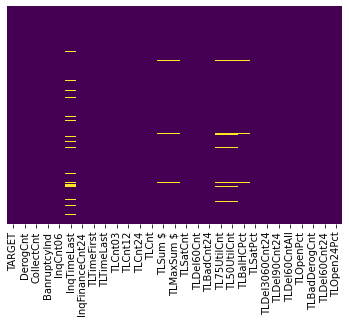

In [9]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
# filling missing values with mean
dataset=dataset.fillna(dataset.mean())

In [11]:
#check-explore missing values post missing value fix
dataset.isna().sum()

TARGET             0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum $            0
TLMaxSum $         0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

# Step 5 Visualizing Data 

In [12]:
# 1. count of good loans (0) and bad loans (1)
dataset['TARGET'].value_counts()

0    2500
1     500
Name: TARGET, dtype: int64

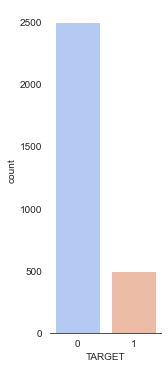

In [13]:
# show in countplot chart
# set style
sns.set_style('white')
# change size
plt.figure(figsize=(2,6))
# countplot chart
sns.countplot(x='TARGET',data=dataset,palette='coolwarm')
# Spine Removal
sns.despine(left=True)

In [14]:
# 2. data summary across 0 & 1
dataset.groupby('TARGET').mean()

,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,TLCnt12,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
TARGET,,,,,,,,,,,,,,,,,,,,,
0,1.3224,0.7664,0.1492,2.9424,3.174638,3.2896,173.002,11.650,0.2844,1.832,...,3.986711,0.733997,0.633265,0.6044,0.6624,2.2236,0.526008,1.180,0.8648,0.554051
1,1.9680,1.3100,0.1740,3.9380,2.775459,4.8820,155.672,12.992,0.2280,1.768,...,4.533870,0.874118,0.324327,1.3340,1.5760,4.0140,0.433021,2.554,2.0860,0.615128


<AxesSubplot:>

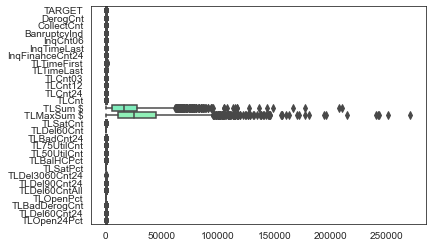

In [15]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=dataset,palette='rainbow',orient='h')

# Step 6 Logistic Regression

# Train Test Split

In [16]:
y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:29].values

In [17]:
# splitting dataset into training and test (in ratio 80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# Data Normalization-scale all independent variables between 0 and 1.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
# Exporting Normalisation Coefficients for later use in prediction
import joblib
joblib.dump(sc, r'SCOREDCARD_NORMALISATION')

['SCOREDCARD_NORMALISATION']

# Risk Model building

In [20]:
# Train and fit a logistic regression model on the training set.
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [21]:
# Exporting Logistic Regression Classifier model for later use in prediction
import joblib
joblib.dump(classifier, r'CLASSIFIER_SCORECARD')

['CLASSIFIER_SCORECARD']

# Prediction & Evaluation

In [22]:
# generate probabilities 
predictions = classifier.predict_proba(X_test)
predictions

array([[0.03966785, 0.96033215],
       [0.94089043, 0.05910957],
       [0.77978187, 0.22021813],
       ...,
       [0.93556609, 0.06443391],
       [0.36454817, 0.63545183],
       [0.82133362, 0.17866638]])

In [23]:
print(confusion_matrix(y_test,y_pred))

[[482  16]
 [ 83  19]]


In [24]:
print(accuracy_score(y_test, y_pred))

0.835


# Writing output file

In [25]:
# writing model output file
df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_prediction_target = pd.DataFrame(classifier.predict(X_test), columns = ['predicted_TARGET'])
df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome'])
dfx=pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)
dfx.to_csv(r"SCOREDCARD_MODEL_PREDICTION.csv", sep=',', encoding='UTF-8')
dfx.head()

,Actual Outcome,prob_0,prob_1,predicted_TARGET
0,1,0.039668,0.960332,1
1,0,0.940890,0.059110,0
2,0,0.779782,0.220218,0
3,0,0.922928,0.077072,0
4,0,0.824084,0.175916,0
